In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
from numpy import linalg as LA
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,DBSCAN
import matplotlib as plt
from sklearn import preprocessing

In [158]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table = data[0]
tickers=table.iloc[:,0].tolist()

tickers_ = []
for i in tickers:
    tickers_.append(i)
    
tickers_.remove("BF.B")
tickers_.remove("BRK.B")

for i in tickers_:
    if i=="BRK.B":
        print("HI")

In [159]:
len(tickers_)

503

In [5]:
def create_tickers_data(ticker_list, period_="1y", interval_="1d",type_ = None):
    if isinstance(ticker_list,str):
        yf_tickers = yf.Ticker(ticker_list)
        return yf_tickers.history(period=period_ , interval=interval_) if type_ == None else\
    yf_tickers.history(period=period_ , interval=interval_).loc[:,type_]
    elif isinstance(ticker_list,list):
        ticker_string =""
        for i in ticker_list:
            ticker_string = ticker_string + i +" "
            pass
        yf_tickers = yf.Tickers(ticker_string)
        return yf_tickers.history(period=period_ , interval=interval_) if type_ == None else\
    yf_tickers.history(period=period_ , interval=interval_).loc[:,type_]
    pass


x = create_tickers_data(["goog" ,"aapl", "msft"],period_="3y",type_=["Close"])
x.head()

[*********************100%***********************]  3 of 3 completed


Close                        
                 AAPL         GOOG       MSFT
Date                                         
2017-11-13  41.513584  1025.750000  80.255028
2017-11-14  40.885990  1026.000000  80.369774
2017-11-15  40.346703  1020.909973  79.745117
2017-11-16  40.828728  1032.500000  79.956528
2017-11-17  40.602024  1019.090027  79.187729

In [6]:
df = create_tickers_data(tickers_ , period_="3y" , type_=["Close"])
df

[*********************100%***********************]  503 of 503 completed


Close                                                \
                     A        AAL         AAP        AAPL       ABBV   
Date                                                                   
2017-11-13   65.382355  44.581234   81.320503   41.513584  80.914474   
2017-11-14   65.703758  44.649452   94.603783   40.885990  80.599724   
2017-11-15   65.557671  45.994492   90.512047   40.346703  79.757584   
2017-11-16   66.950447  46.472088   89.444656   40.828728  80.361557   
2017-11-17   66.999138  46.189426   88.229012   40.602024  79.629982   
...                ...        ...         ...         ...        ...   
2020-11-09  112.500000  13.200000  156.630005  116.320000  95.120003   
2020-11-10  110.199997  12.380000  155.419998  115.970001  98.870003   
2020-11-11  109.410004  12.040000  156.520004  119.489998  98.150002   
2020-11-12  109.440002  11.740000  153.059998  119.209999  97.599998   
2020-11-13  111.029999  12.119800  153.250000  118.430000  99.419998   

                                                                        ...  \
                   ABC        ABMD         ABT         ACN        ADBE  ...   
Date                                                                    ...   
2017-11-13   71.102554  195.130005   52.589672  137.402161  181.850006  ...   
2017-11-14   71.102554  193.750000   52.313881  138.395065  181.320007  ...   
2017-11-15   73.111168  193.110001   52.142712  137.726746  180.080002  ...   
2017-11-16   75.732704  194.910004   52.817913  140.380859  182.300003  ...   
2017-11-17   74.699928  194.320007   52.836937  138.862885  182.240005  ...   
...                ...         ...         ...         ...         ...  ...   
2020-11-09  105.819336  279.609985  109.389999  240.220001  471.140015  ...   
2020-11-10  109.623497  268.839996  110.809998  238.710007  452.000000  ...   
2020-11-11  106.884895  269.279999  112.650002  242.750000  467.750000  ...   
2020-11-12  105.659996  268.290009  111.949997  238.149994  462.579987  ...   
2020-11-13  107.870003  271.940002  112.500000  240.296204  464.695007  ...   

                                                                    \
                  XLNX        XOM       XRAY        XRX        XYL   
Date                                                                 
2017-11-13   68.562965  70.336494  64.222099  24.920908  63.597488   
2017-11-14   68.629646  69.784927  63.821930  24.841288  63.896046   
2017-11-15   67.572357  68.910919  65.002907  24.920908  63.472271   
2017-11-16   69.220215  68.359367  65.569000  25.000534  64.030899   
2017-11-17   68.401054  68.087837  65.930138  25.088997  63.973122   
...                ...        ...        ...        ...        ...   
2020-11-09  130.350006  36.060001  51.400002  21.500000  93.529999   
2020-11-10  122.449997  36.860001  52.959999  21.620001  95.110001   
2020-11-11  127.059998  36.480000  49.849998  21.219999  93.800003   
2020-11-12  127.650002  35.230000  49.049999  20.410000  92.360001   
2020-11-13  127.449997  35.875000  51.645000  21.315001  94.324997   

                                                                       
                   YUM         ZBH        ZBRA       ZION         ZTS  
Date                                                                   
2017-11-13   75.678909  108.397507  104.940002  41.608780   67.650719  
2017-11-14   75.669395  109.519943  104.989998  42.730118   68.652504  
2017-11-15   75.069229  108.417030  104.339996  42.739304   68.377510  
2017-11-16   74.821533  109.549217  107.860001  42.380844   69.153427  
2017-11-17   74.878685  108.934326  108.760002  42.555481   69.526619  
...                ...         ...         ...        ...         ...  
2020-11-09  101.980003  155.949997  352.709991  39.240002  165.199997  
2020-11-10  102.989998  150.160004  345.019989  38.980000  162.559998  
2020-11-11  101.820000  149.399994  356.269989  37.240002  164.949997  
2020-11-12  100.419998  148.429993  340.779999  36.33000

In [2]:
import os
import sys
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:

list_=[]
path = "/Users/matthewchuang/Documents/GitHub/algo_test/datas/20200105/daily"

df = pd.read_csv(path+"/A.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.close.to_frame()
df = df.rename(columns={"close":"AACQ"})
df.head()

,AACQ
date,
2000-10-05,39.4313
2000-10-06,37.3301
2000-10-09,36.2572
2000-10-10,35.4524
2000-10-11,32.7700


In [5]:
def find_Return(price):
    ret = (price - price.shift(1))/price
    ret = ret.drop(ret.index[0])
    # fill the nan values with 0
    ret = ret.fillna(value = 0)
    return ret
def find_file_name(string):
    string = str(string)
    k=0
    for i in range(len(string)):
        if string[-i-1] == "/":
            return string[-i:-4]

In [6]:
for file in Path(path).iterdir():
    if file.is_file():
        file_name = find_file_name(file)
        temp = pd.read_csv(file)
        temp['date'] = pd.to_datetime(temp['date'])
        temp.set_index('date', inplace=True)
        temp = temp.close.to_frame()
        temp = temp.rename(columns={"close":file_name})
        df = pd.concat([df, temp], axis=1)

In [9]:
df = df.loc[:,~df.columns.duplicated()]
print(df.shape)
print(len(df.columns.unique()))
df.to_pickle("merge.pkl")


(5093, 1794)
1794


In [14]:
df1=df.copy()
df1.dropna(axis=1)
ret = preprocessing.StandardScaler().fit_transform(find_Return(df1))

ret.shape

(5092, 1794)

In [15]:

prin_components = 50 
pca = PCA(n_components=prin_components)
pca.fit(ret)


PCA(n_components=50)

In [18]:
X = pca.components_.T
X.shape
X = preprocessing.StandardScaler().fit_transform(X)

In [19]:
best = 0
best_i = 0
for i in range(1,400):
    labels = DBSCAN(min_samples=2,eps=0.01*i).fit_predict(X)
    if len(list(set(labels))) > best:
        best_i = 0.01*i
        best = len(list(set(labels)))
        print(best_i)
        print(best)

0.01
2
2.08
3
2.37
4
2.38
5
2.47
6
2.52
7
2.56
8
2.59
9
2.61
10
2.62
11
2.67
12
2.7600000000000002
13
2.84
14
2.85
15
2.88
16
2.96
17
3.02
18
3.0300000000000002
19
3.08
20
3.13
21
3.16
22
3.18
23
3.2
25
3.25
28
3.27
30
3.2800000000000002
31
3.29
32
3.33
33
3.34
35
3.37
36
3.38
37
3.41
38
3.43
39
3.44
41
3.46
42
3.48
44
3.5
45
3.5100000000000002
46
3.52
47
3.5300000000000002
48
3.5500000000000003
50
3.58
52
3.59
53
3.6
54
3.62
56
3.63
59
3.69
61
3.71
62
3.72
63
3.74
64
3.84
65
3.85
66
3.86
68
3.88
69
3.89
74
3.9
78
3.92
79
3.93
80
3.96
81
3.98
82


In [41]:
clustered = DBSCAN(min_samples=2,eps=2.67).fit_predict(X)

clustered_series = pd.Series(index=df1.columns, data=clustered.flatten())
clustered_series_all = pd.Series(index=df1.columns, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]
clustered_series

AACQ     0
A        0
CP       1
HMY      2
GGB      3
REG      4
SID      3
ZNH      5
FRT      4
CNI      1
ELP      6
NSC      7
HQL      8
AVB      9
HQH      8
CEA      5
TD      10
CM      10
GFI      2
CSX      7
EQR      9
CIG      6
dtype: int64

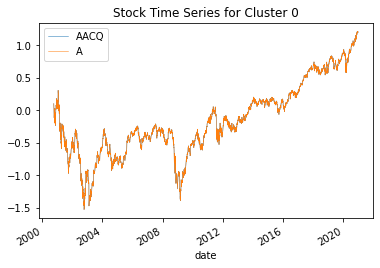

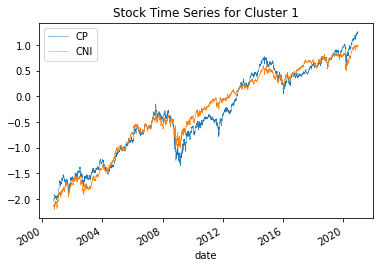

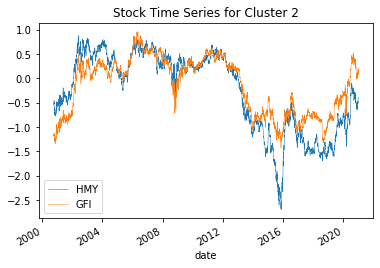

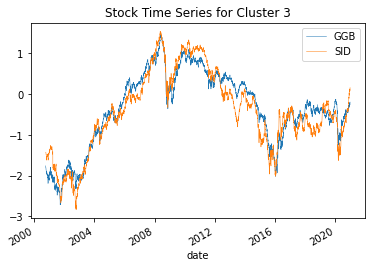

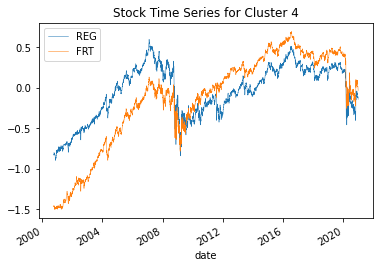

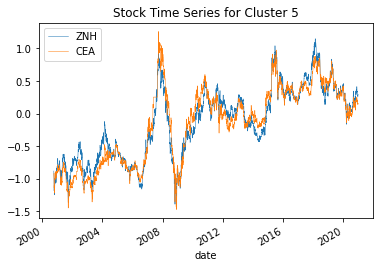

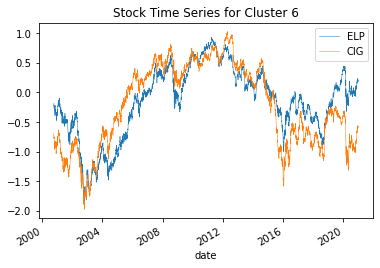

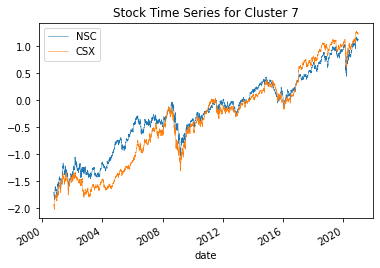

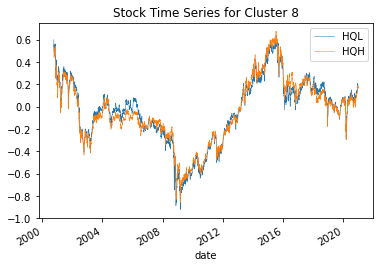

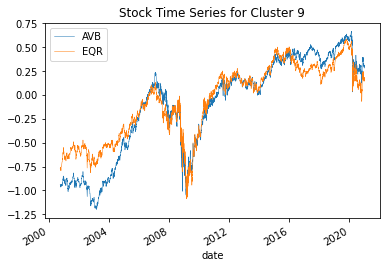

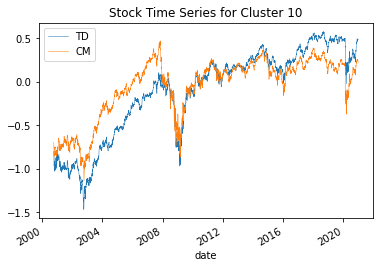

In [45]:
counts = clustered_series.value_counts()
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 40)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(df1[tickers].mean())
    data = np.log(df1[tickers]).sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % clust,linewidth=0.5)

[0,
 39,
 79,
 42,
 44,
 46,
 47,
 48,
 49,
 50,
 52,
 54,
 56,
 57,
 58,
 59,
 61,
 63,
 78,
 77,
 76,
 75,
 73,
 72,
 35,
 71,
 69,
 68,
 67,
 66,
 65,
 64,
 70,
 34,
 40,
 32,
 3,
 6,
 7,
 8,
 10,
 12,
 13,
 14,
 17,
 33,
 23,
 80,
 30,
 28,
 31,
 38,
 29,
 15,
 62,
 60,
 74,
 25,
 2,
 21,
 53,
 22,
 51,
 24,
 16,
 27,
 36,
 5,
 37,
 43,
 41,
 26,
 11,
 45,
 4,
 20,
 9,
 18,
 55,
 1,
 19]

In [37]:
df1.AACQ

date
2000-10-05     39.4313
2000-10-06     37.3301
2000-10-09     36.2572
2000-10-10     35.4524
2000-10-11     32.7700
                ...   
2020-12-28    117.8300
2020-12-29    117.2300
2020-12-30    117.3900
2020-12-31    118.4900
2021-01-04    118.6400
Name: AACQ, Length: 5093, dtype: float64

,AACQ,CSCO,SBGI,UFCS,GFED,AIRT,SITC,NXN,ISSC,TRNS,...,REX,PLXS,NUS,NWL,ARGO,BLK,BMO,NXC,PPL,OBCI
date,,,,,,,,,,,,,,,,,,,,,
2000-10-05,39.4313,57.5625,10.0000,8.4688,11.6250,2.0000,19.4385,13.1875,12.4167,2.2500,...,8.5278,63.7500,6.1875,22.50,16.7376,36.8125,23.8438,14.3125,18.7444,0.9091
2000-10-06,37.3301,56.1875,10.5625,8.4688,11.8750,2.0000,19.2525,13.2500,11.8333,2.2188,...,8.3889,60.3750,6.1875,22.50,16.7989,37.0000,23.6562,14.1250,19.0064,0.8523
2000-10-09,36.2572,53.6875,10.0625,8.3438,11.7500,2.0104,19.1587,13.1250,11.5000,2.1250,...,8.1389,56.6250,6.4375,22.75,16.4310,37.3750,23.5938,14.1250,18.6571,0.8523
2000-10-10,35.4524,51.1250,10.1250,8.3438,11.7500,2.0104,18.9727,13.1875,11.2917,2.0000,...,8.0000,51.3125,6.4375,22.75,16.2471,37.7500,23.1562,14.0625,19.2683,0.8523
2000-10-11,32.7700,51.1875,9.9375,8.4688,11.5625,2.0104,18.7867,13.0000,11.3333,2.0312,...,7.8333,51.2500,6.1875,22.75,16.4310,36.0625,22.5312,13.8750,19.5885,0.8523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,117.8300,44.9200,32.2400,25.0200,17.6300,20.2900,10.2700,13.8300,6.4500,33.9600,...,74.4700,78.4800,53.9000,21.24,43.5200,710.1800,75.9100,16.4100,27.2500,14.1200
2020-12-29,117.2300,44.6400,31.5500,24.6900,19.0000,19.3100,10.0100,13.8400,6.4200,34.1300,...,74.6600,77.2400,53.5600,20.98,42.8600,706.2800,75.8300,16.5000,27.3000,14.4100
2020-12-30,117.3900,44.4800,32.3100,25.1800,17.3500,20.3700,10.1200,14.1200,6.4900,33.6100,...,74.8700,77.6500,54.3000,21.08,43.7700,708.9400,75.7300,16.0900,27.5900,14.0800


In [24]:
print(df1.shape)


(5093, 1794)
(5092, 1794)


array([[-0.029438  ,  0.01617723, -0.06036683, ..., -0.01024961,
         0.02117382, -0.01594847],
       [-0.02739904,  0.02270829, -0.06293111, ...,  0.01901403,
        -0.00159362,  0.01015927],
       [-0.02514693,  0.00668845,  0.00442098, ..., -0.02405772,
         0.02410826, -0.01937299],
       ...,
       [-0.01060087, -0.05976096,  0.00809094, ..., -0.03407669,
         0.02315952,  0.03781071],
       [-0.02502462, -0.02660532,  0.00883437, ...,  0.005486  ,
        -0.0174483 , -0.01940119],
       [-0.00232351, -0.00289579, -0.00853059, ..., -0.00102384,
        -0.00390345, -0.01622885]])

In [44]:
df1.iloc[3800:,:]

,AACQ,CSCO,SBGI,UFCS,GFED,AIRT,SITC,NXN,ISSC,TRNS,...,REX,PLXS,NUS,NWL,ARGO,BLK,BMO,NXC,PPL,OBCI
date,,,,,,,,,,,,,,,,,,,,,
2015-11-13,36.77,26.21,33.03,39.32,14.61,15.6133,27.0242,13.25,2.55,9.56,...,56.92,35.77,33.00,42.68,49.3755,343.25,55.74,15.32,33.06,2.68
2015-11-16,37.33,26.79,34.19,39.30,14.61,16.9733,27.4534,13.30,2.44,9.75,...,57.29,36.46,33.41,43.24,49.5494,352.33,56.71,15.38,34.03,2.67
2015-11-17,38.38,26.81,34.10,39.17,14.60,16.7067,27.7506,13.29,2.55,9.64,...,55.15,36.11,31.89,43.43,49.5889,353.42,56.90,15.25,33.37,2.63
2015-11-18,39.34,27.12,34.63,39.58,14.60,16.7000,27.8992,13.32,2.41,9.42,...,56.89,36.41,32.50,44.10,50.5929,360.63,57.09,15.33,33.62,2.45
2015-11-19,38.50,27.37,34.40,39.30,14.60,17.1133,27.9157,13.27,2.45,9.57,...,56.55,36.94,33.19,43.93,50.5929,359.09,57.64,15.31,34.11,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,117.83,44.92,32.24,25.02,17.63,20.2900,10.2700,13.83,6.45,33.96,...,74.47,78.48,53.90,21.24,43.5200,710.18,75.91,16.41,27.25,14.12
2020-12-29,117.23,44.64,31.55,24.69,19.00,19.3100,10.0100,13.84,6.42,34.13,...,74.66,77.24,53.56,20.98,42.8600,706.28,75.83,16.50,27.30,14.41
2020-12-30,117.39,44.48,32.31,25.18,17.35,20.3700,10.1200,14.12,6.49,33.61,...,74.87,77.65,54.30,21.08,43.7700,708.94,75.73,16.09,27.59,14.08


In [ ]:
pca = PCA(n_components=200,copy=True)
PC = pca.fit_transform(df1)


In [46]:
best = 0
best_i = 0
for i in range(1,400):
    labels = DBSCAN(min_samples=2,eps=0.01*i).fit_predict(ret)
    if len(list(set(labels))) > best:
        best_i = 0.01*i
        best = len(list(set(labels)))
        print(best_i)
        print(best)

0.01
1


In [37]:
labels = DBSCAN(min_samples=2,eps=0.02).fit_predict(ret)
len(list(set(labels)))

1

In [28]:
clustering = DBSCAN(min_samples=2,eps=0.33).fit(ret.T)
print(clustering.labels_)



[ 0 -1 -1 ... -1 -1 -1]


In [29]:
print(list(set(clustering.labels_)))

[0, -1]


1794

In [153]:
name =[0 for i in range(25)]
index__ =[0 for i in range(25)]
for i in range(len(clustering.labels_)):
    if clustering.labels_[i] == -1:
        pass
    else:
        if isinstance(name[clustering.labels_[i]],int):
            name[clustering.labels_[i]]=[ret.columns[i]]
            index__[clustering.labels_[i]]=[i]
        else:
            name[clustering.labels_[i]].append(ret.columns[i])
            index__[clustering.labels_[i]].append(i)
ret.columns[0]
name


[[('Close', 'ACN'), ('Close', 'MA'), ('Close', 'V')],
 [('Close', 'AEE'),
  ('Close', 'AEP'),
  ('Close', 'ATO'),
  ('Close', 'AWK'),
  ('Close', 'CL'),
  ('Close', 'CMS'),
  ('Close', 'D'),
  ('Close', 'DTE'),
  ('Close', 'DUK'),
  ('Close', 'ED'),
  ('Close', 'ES'),
  ('Close', 'ETR'),
  ('Close', 'EVRG'),
  ('Close', 'EXC'),
  ('Close', 'KMB'),
  ('Close', 'KO'),
  ('Close', 'LNT'),
  ('Close', 'MDLZ'),
  ('Close', 'NEE'),
  ('Close', 'NI'),
  ('Close', 'PEG'),
  ('Close', 'PEP'),
  ('Close', 'PG'),
  ('Close', 'PNW'),
  ('Close', 'RSG'),
  ('Close', 'SO'),
  ('Close', 'WEC'),
  ('Close', 'WM'),
  ('Close', 'XEL')],
 [('Close', 'AIV'),
  ('Close', 'ARE'),
  ('Close', 'AVB'),
  ('Close', 'DRE'),
  ('Close', 'EQR'),
  ('Close', 'ESS'),
  ('Close', 'MAA'),
  ('Close', 'PLD'),
  ('Close', 'UDR')],
 [('Close', 'AJG'), ('Close', 'AON'), ('Close', 'MMC'), ('Close', 'WLTW')],
 [('Close', 'AMT'), ('Close', 'CCI'), ('Close', 'SBAC')],
 [('Close', 'BAC'),
  ('Close', 'C'),
  ('Close', 'GL'),
 

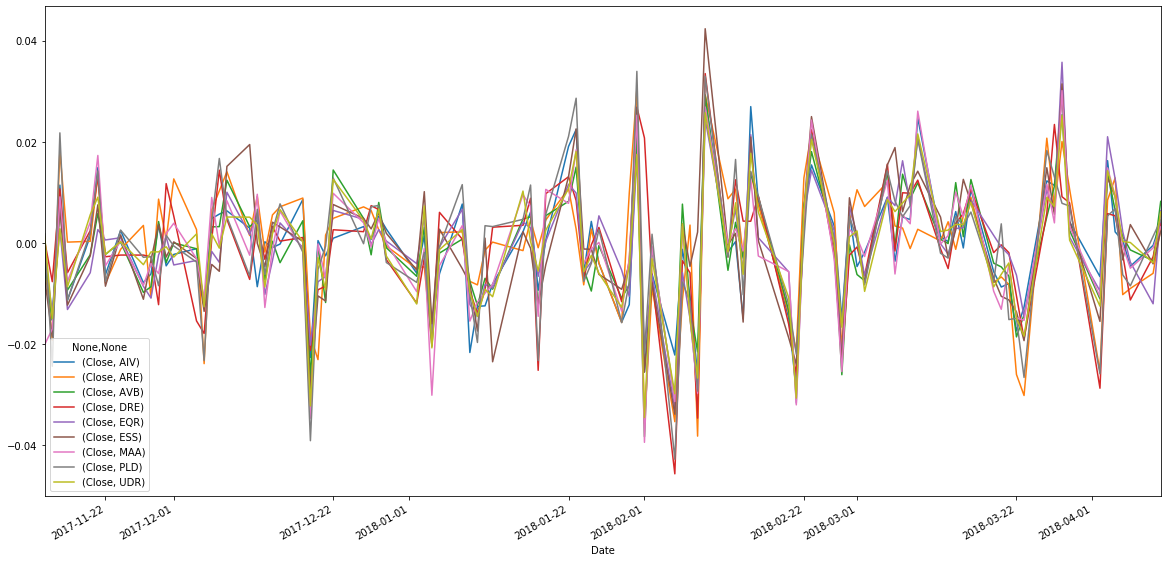

In [152]:
lines= ret.iloc[:100,index__[2]].plot.line(figsize=(20,10))

In [154]:
import socket
print(socket.gethostname())

Matthews-MBP


In [208]:
df1=df.copy()
df1.replace("",float("Nan"),inplace=True)
df1.fillna(method="bfill",inplace=True)
average = df1.mean()
df2 = df1-average

M=df2.cov()
s,v,d=LA.svd(M)

[[-0.01136037 -0.00117982 -0.0005713  ...  0.00189577  0.00441932
   0.00278854]
 [ 0.0110218   0.01140996 -0.01815293 ...  0.00474206 -0.00218121
  -0.00743926]
 [-0.00635691 -0.01177162  0.01906493 ... -0.00047675 -0.00059506
   0.00102348]
 ...
 [-0.04963869 -0.01447351  0.0484034  ...  0.00105947 -0.00085199
   0.00032813]
 [ 0.00521003  0.00722066 -0.00881934 ...  0.01862639 -0.01649596
  -0.008626  ]
 [-0.02860045 -0.00153969  0.0210196  ... -0.00465179  0.01176383
  -0.00225641]]
[[-0.01136037  0.0110218  -0.00635691 ... -0.04963869  0.00521003
  -0.02860045]
 [-0.00117982  0.01140996 -0.01177162 ... -0.01447351  0.00722066
  -0.00153969]
 [-0.0005713  -0.01815293  0.01906493 ...  0.0484034  -0.00881934
   0.0210196 ]
 ...
 [ 0.00189577  0.00474206 -0.00047675 ...  0.00105947  0.01862639
  -0.00465179]
 [ 0.00441932 -0.00218121 -0.00059506 ... -0.00085199 -0.01649596
   0.01176383]
 [ 0.00278854 -0.00743926  0.00102348 ...  0.00032813 -0.008626
  -0.00225641]]


Close                                                \
                     A        AAL         AAP        AAPL       ABBV   
Date                                                                   
2017-11-02   66.590073  46.146866   80.846115   41.422508  78.524117   
2017-11-03   66.590073  46.146866   80.846115   41.422508  78.524117   
2017-11-06   66.443977  46.205212   79.768799   41.842739  79.077049   
2017-11-07   66.473198  45.184052   78.454323   41.977203  79.927719   
2017-11-08   66.336838  45.096523   78.483978   42.320599  81.416374   
...                ...        ...         ...         ...        ...   
2020-10-27  106.040001  11.230000  150.410004  116.599998  82.709999   
2020-10-28  101.660004  10.950000  146.380005  111.199997  80.489998   
2020-10-29  102.019997  11.160000  146.000000  115.320000  80.669998   
2020-10-30  102.089996  11.280000  147.279999  108.860001  85.099998   
2020-11-02  105.239998  11.190000  151.380005  108.769997  88.250000   

                                                                       ...  \
                  ABC        ABMD         ABT         ACN        ADBE  ...   
Date                                                                   ...   
2017-11-02  70.830498  194.899994   52.751347  137.516708  182.300003  ...   
2017-11-03  70.830498  194.899994   52.751347  137.516708  182.300003  ...   
2017-11-06  70.887299  196.550003   52.313881  137.411713  180.800003  ...   
2017-11-07  70.934654  197.210007   52.456535  137.001175  180.880005  ...   
2017-11-08  71.029343  196.970001   52.542126  138.328201  184.059998  ...   
...               ...         ...         ...         ...         ...  ...   
2020-10-27  97.650002  290.510010  108.580002  220.660004  478.559998  ...   
2020-10-28  95.699997  283.000000  106.419998  213.940002  456.970001  ...   
2020-10-29  94.589996  254.610001  105.000000  216.440002  461.109985  ...   
2020-10-30  96.070000  251.880005  105.110001  216.910004  447.100006  ...   
2020-11-02  98.940002  254.850006  107.480003  220.190002  444.940002  ...   

                                                                               \
                  XLNX        XOM       XRAY        XRX        XYL        YUM   
Date                                                                            
2017-11-02   69.204590  71.622620  63.246086  25.708260  64.300087  74.891197   
2017-11-03   69.204590  71.622620  63.246086  25.708260  64.300087  74.891197   
2017-11-06   70.820610  72.113419  62.338383  25.725954  64.271103  75.802292   
2017-11-07   70.259758  71.967056  62.836147  25.292467  64.338722  76.884239   
2017-11-08   69.984093  71.872345  62.963032  25.982504  64.280777  76.998123   
...                ...        ...        ...        ...        ...        ...   
2020-10-27  124.349998  32.820000  47.540001  18.520000  89.059998  97.989998   
2020-10-28  119.760002  31.570000  44.840000  17.230000  87.349998  95.059998   
2020-10-29  122.900002  32.970001  44.799999  17.650000  86.860001  94.940002   
2020-10-30  118.690002  32.619999  47.189999  17.379999  87.139999  93.330002   
2020-11-02  118.480003  33.990002  47.700001  18.129999  88.589996  95.250000   

                                                           
                   ZBH        ZBRA       ZION         ZTS  
Date                                                       
2017-11-02  106.630913  114.330002  43.244194   67.360611  
2017-11-03  106.630913  114.330002  43.244194   67.360611  
2017-11-06  106.718750  115.790001  42.911610   68.360886  
2017-11-07  106.113609  109.309998  41.461212   67.125252  
2017-11-08  106.552826  106.610001  41.147102   68.269463  
...                ...         ...        ...         ...  
2020-10-27  138.600006  289.279999  31.080000  162.470001  
2020-10-28  133.369995  285.200012  30.600000  158.690002  
2020-10-29  133.839996  291.970001  31.559999  161.190002  
2020-10-30  132.100006  283.640015  32.270000  158.550003  


In [169]:
len(d[0])

503

In [211]:
# coding: utf-8

from __future__ import division
from collections import Iterable

import numpy as np 
from pandas import Series

def calcHurst2(ts):

    if not isinstance(ts, Iterable):
        print ("error")
        return

    n_min, n_max = 2, len(ts)//3
    RSlist = []
    for cut in range(n_min, n_max):
        children = len(ts) // cut
        children_list = [ts[i*children:(i+1)*children] for i in range(cut)]
        L = []
        for a_children in children_list:
            Ma = np.mean(a_children)
            Xta = Series(map(lambda x: x-Ma, a_children)).cumsum()
            Ra = max(Xta) - min(Xta)
            Sa = np.std(a_children)
            rs = Ra / Sa
            L.append(rs)
        RS = np.mean(L)
        RSlist.append(RS)
    return np.polyfit(np.log(range(2+len(RSlist),2,-1)), np.log(RSlist), 1)[0]

/Users/matthewchuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  after removing the cwd from sys.path.


True